In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Age:

In [3]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

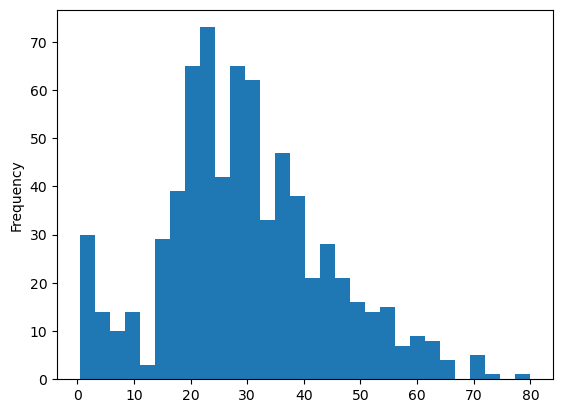

In [4]:
df['Age'].plot(kind='hist',bins=30)
plt.show()

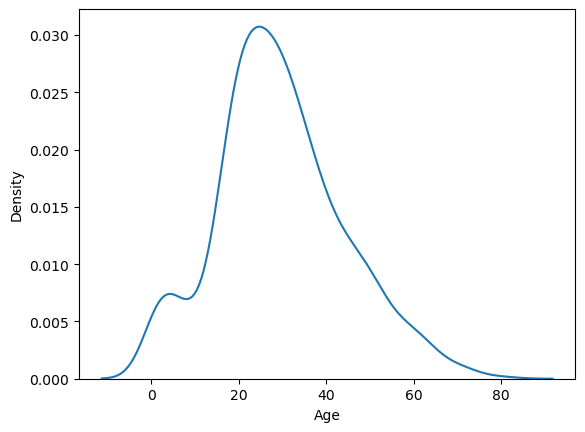

In [5]:
sns.kdeplot(data=df['Age'])
plt.show()

In [6]:
print(df['Age'].skew())
print(df['Age'].isnull().sum())

0.38910778230082704
177


<Axes: >

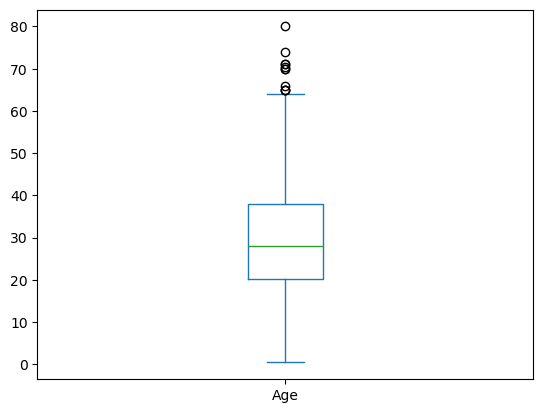

In [7]:
df['Age'].plot(kind='box')

**Conclusion**
- Age is Normally(almost) distributed
- 20% of the values are missing
- there are some outliers

# Fare

In [8]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: ylabel='Frequency'>

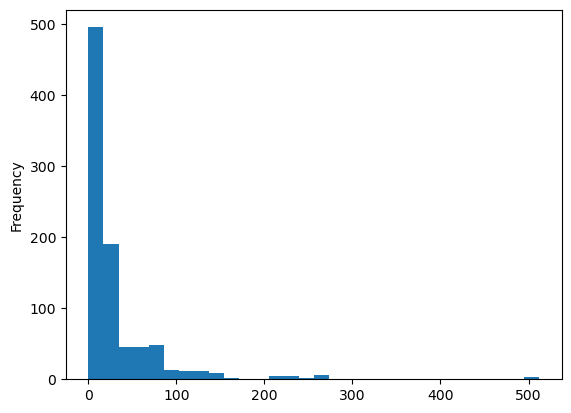

In [9]:
df['Fare'].plot(kind='hist',bins=30)

<Axes: ylabel='Density'>

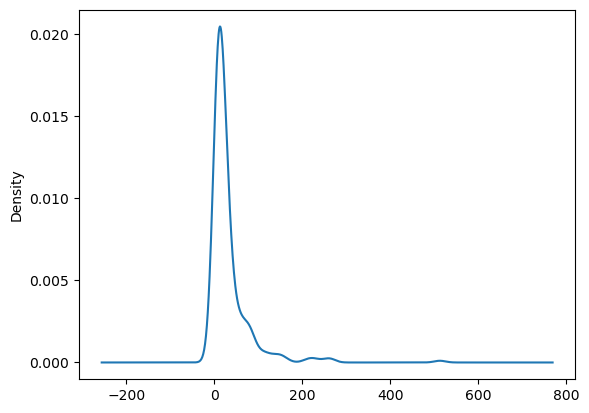

In [10]:
df['Fare'].plot(kind='kde')

In [11]:
print(df['Fare'].skew())
print(df['Fare'].isnull().sum())

4.787316519674893
0


**Conclusion**
- The data is highly(positively) skewed
- The fare column actually contains the group fare and not the individual fare(this might be an issue)
- We need to create a new col called individual fare

# Survived

In [12]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: ylabel='count'>

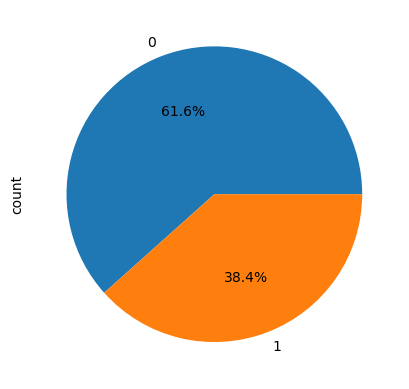

In [13]:
df['Survived'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [14]:
df['Survived'].isnull().sum()

np.int64(0)

# **Bi-Variate Analysis**

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
pd.crosstab(df['Survived'],df['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


<Axes: xlabel='Pclass', ylabel='Survived'>

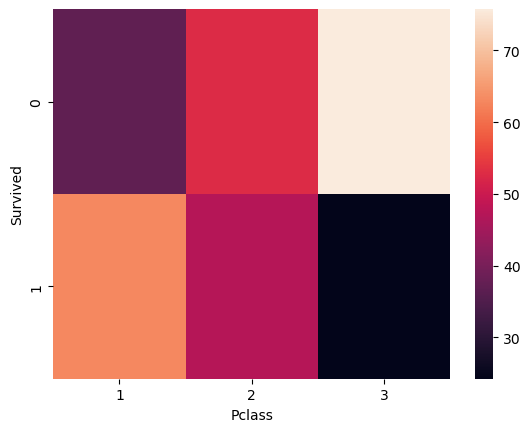

In [17]:
#sns.heatmap(pd.crosstab(df['Survived'],df['Pclass']))
sns.heatmap(pd.crosstab(df['Survived'],df['Pclass'],normalize='columns')*100)# this will give persentage of survived vs died in each class

In [18]:
pd.crosstab(df['Survived'],df['Sex'],normalize='columns')*100

Sex,female,male
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815


In [19]:
pd.crosstab(df['Survived'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Survived,,,
0,44.642857,61.038961,66.304348
1,55.357143,38.961039,33.695652


In [20]:
pd.crosstab(df['Sex'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Sex,,,
female,43.452381,46.753247,31.521739
male,56.547619,53.246753,68.478261


In [21]:
pd.crosstab(df['Pclass'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Pclass,,,
1,50.595238,2.597403,19.720497
2,10.119048,3.896104,25.465839
3,39.285714,93.506494,54.813665


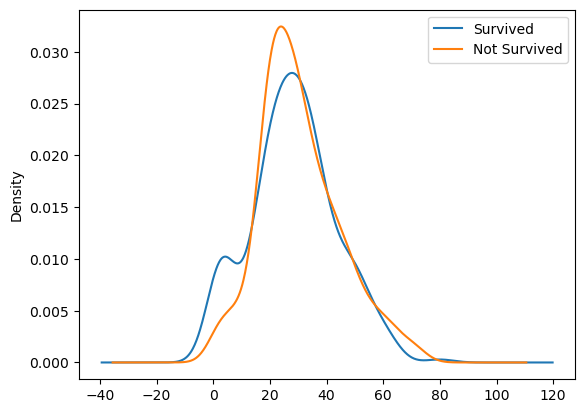

In [22]:
df[df['Survived']==1]['Age'].plot(kind='kde',label='Survived')
df[df['Survived']==0]['Age'].plot(kind='kde',label='Not Survived')
plt.legend()
plt.show()

## **Feature Engineering**

In [23]:
df1=pd.read_csv('test.csv')

In [24]:
df=pd.concat([df,df1])

In [25]:
df['individual_fare']=df['Fare']/(df['SibSp']+df['Parch']+1)

<Axes: >

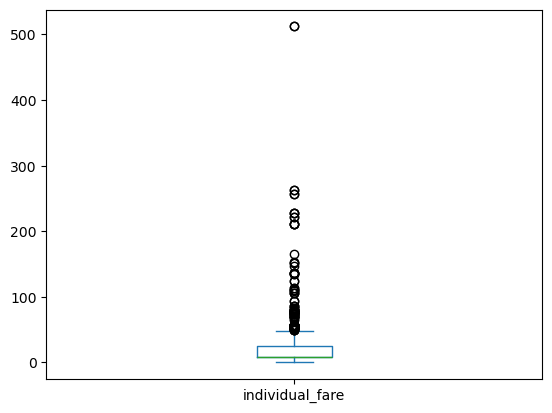

In [26]:
df['individual_fare'].plot(kind='box')

In [27]:
df['family_size']=df['SibSp']+df['Parch']+1

In [28]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.625000,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.925000,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.050000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000,1
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000,1
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000,1
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000,1


In [29]:
# Family Type
#1-> alone
#1-4->small
#>4->large
def make_type(num):
    if num==1:
        return 'Alone'
    elif num>1 and num<5:
        return 'small'
    else:
        return 'large'

In [30]:
df['family_type']=df['family_size'].apply(make_type)

In [31]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size,family_type
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.625000,2,small
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650,2,small
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.925000,1,Alone
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000,2,small
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.050000,1,Alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000,1,Alone
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000,1,Alone
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000,1,Alone
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000,1,Alone


In [32]:
pd.crosstab(df['Survived'],df['family_type'],normalize='columns')*100

family_type,Alone,large,small
Survived,,,
0.0,69.646182,83.870968,42.123288
1.0,30.353818,16.129032,57.876712


In [35]:
df['Surname']=df['Name'].str.split(',').str.get(0)

In [43]:
df['title']=df['Name'].str.split(',').str.get(1).str.strip().str.split('.').str.get(0)

In [55]:
df['title'].value_counts()

title
Mr        757
Miss      260
Mrs       197
Master     61
other      34
Name: count, dtype: int64

In [54]:
titles_to_replace = ['Rev', 'Dr', 'Col', 'Major', 'Don', 'Capt', 'the', 'Jonkheer','Mlle','Mme','Lady','Sir','Ms','the Countess','Dona']
df['title'] = df['title'].apply(lambda x: 'other' if x in titles_to_replace else x)


In [60]:
pd.crosstab(df['Survived'],df['title'],normalize='columns')*100

title,Master,Miss,Mr,Mrs,other
Survived,,,,,
0.0,42.5,30.21978,84.332689,20.8,55.555556
1.0,57.5,69.78022,15.667311,79.2,44.444444


<Axes: xlabel='title', ylabel='Survived'>

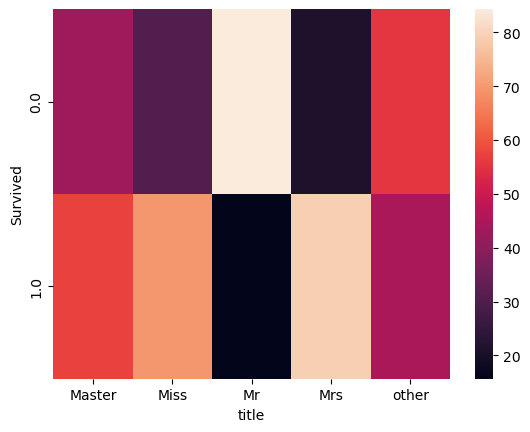

In [59]:
sns.heatmap(pd.crosstab(df['Survived'],df['title'],normalize='columns')*100)

In [61]:
df['Cabin'].isnull().sum()

np.int64(1014)

In [66]:
df['Cabin'].fillna('M',inplace=True)

In [67]:
df['Deck']=df['Cabin'].str[0]

In [68]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size,family_type,Surname,title,Deck
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,3.625000,2,small,Braund,Mr,M
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650,2,small,Cumings,Mrs,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,7.925000,1,Alone,Heikkinen,Miss,M
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000,2,small,Futrelle,Mrs,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,8.050000,1,Alone,Allen,Mr,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,M,S,8.050000,1,Alone,Spector,Mr,M
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000,1,Alone,Oliva y Ocana,other,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,M,S,7.250000,1,Alone,Saether,Mr,M
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,M,S,8.050000,1,Alone,Ware,Mr,M


In [69]:
pd.crosstab(df['Deck'],df['Pclass'])

Pclass,1,2,3
Deck,,,
A,22,0,0
B,65,0,0
C,94,0,0
D,40,6,0
E,34,4,3
F,0,13,8
G,0,0,5
M,67,254,693
T,1,0,0


<Axes: xlabel='Deck'>

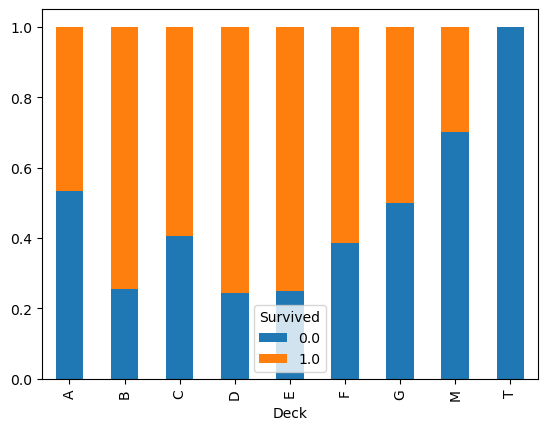

In [76]:
pd.crosstab(df['Deck'],df['Survived'],normalize='index').plot(kind='bar',stacked=True)